In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc as scmisc
import pandas as pd
import io
import cv2
import math

In [71]:
x_train = np.loadtxt('datasets/train_x.csv', delimiter=',')
# y_train = np.loadtxt('datasets/train_y.csv', delimiter=',')
x_test = np.loadtxt('datasets/test_x.csv', delimiter=',')
# x_originals = np.loadtxt('datasets/test_x.csv', delimiter=',')


In [73]:
x_test[x_test<240] = 0
x_test[x_test>=240] = 255

42.5 47.5 15
14.30044937133789


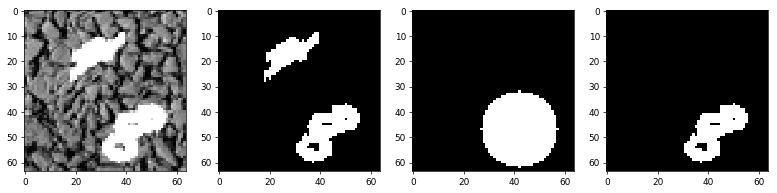

In [75]:
def plotPreprocessingStepsMinBoundingCircle():
#     imageNum = 2501
#     imageNum = 902
    imageNum = 904
    xImgFiltTest = x_test.reshape(-1,64,64)
    xImgOrgTest = x_originals.reshape(-1,64,64)

    imageOrg = xImgOrgTest[imageNum].astype('uint8')
    imageFilt = xImgFiltTest[imageNum].astype('uint8')
    fig=plt.figure(figsize=(15,6), dpi=64)
    a = fig.add_subplot(1,4,1)
    plt.imshow(imageOrg, cmap='gray')
    a = fig.add_subplot(1,4,2)
    plt.imshow(imageFilt, cmap='gray')


    ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,1)
    # print('Contours: \n', contours)
#     print('Hierarchy: \n', hierarchy)

    largest_areas = sorted(contours, key=lambda cont: cv2.minEnclosingCircle(cont)[1])
    
    cnt=largest_areas[-1]

    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(math.ceil(radius))
    mask = np.zeros(imageFilt.shape, np.int8)
    circle = cv2.circle(mask, center, radius, (255,255,255),-1)
    
    print(x,y,radius)
    print(cv2.minEnclosingCircle(cnt)[1])
    a = fig.add_subplot(1,4,3)
    
    plt.imshow(circle, cmap='gray')
    
    testing = cv2.bitwise_and(imageFilt, imageFilt, mask=circle)

    a = fig.add_subplot(1,4,4)
    plt.imshow(testing, cmap='gray')    

#     print('rect',rect)
#     box = cv2.boxPoints(rect)
#     print('box', box)
#     box = np.int0(box)
#     poly = np.array([box], dtype=np.int32)
#     mask = np.zeros(imageFilt.shape, np.uint8)
#     cv2.fillPoly(mask, poly, 255)
    


#     contoursImage = cv2.drawContours(imageFilt, [box], 0, (150,0,255),1)
#     a = fig.add_subplot(1,4,4)
#     plt.imshow(mask, cmap='gray')
plotPreprocessingStepsMinBoundingCircle()

Hierarchy: 
 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2 -1 -1]]]
rect ((30.5, 25.5), (13.0, 21.0), -0.0)
box [[24. 36.]
 [24. 15.]
 [37. 15.]
 [37. 36.]]


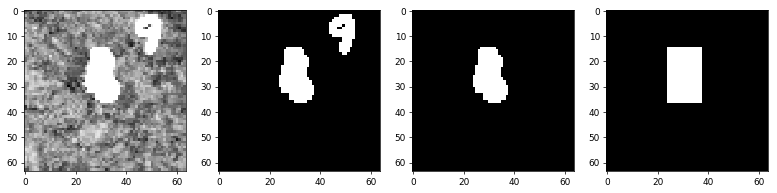

In [239]:
def plotPreprocessingStepsMinBoundingSquare():
    # imageNum = 2501
    imageNum = 900
    xImgFiltTest = x_test.reshape(-1,64,64)
    xImgOrgTest = x_originals.reshape(-1,64,64)

    imageOrg = xImgOrgTest[imageNum].astype('uint8')
    imageFilt = xImgFiltTest[imageNum].astype('uint8')
    fig=plt.figure(figsize=(15,6), dpi=64)
    a = fig.add_subplot(1,4,1)
    plt.imshow(imageOrg, cmap='gray')
    a = fig.add_subplot(1,4,2)
    plt.imshow(imageFilt, cmap='gray')


    ret, thresh = cv2.threshold(imageFilt,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,2)
    # print('Contours: \n', contours)
    print('Hierarchy: \n', hierarchy)

    # cnt=contours[3]
    # print('cnt', cnt)
    largest_areas = sorted(contours, key=lambda cont: cv2.minAreaRect(cont)[1][0]*cv2.minAreaRect(cont)[1][1])
    # largest_areas = sorted(contours, key=cv2.contourArea)
    # print(largest_areas)
    # print(contours)
    cnt=largest_areas[-1]

    rect=cv2.minAreaRect(cnt)


    print('rect',rect)
    box = cv2.boxPoints(rect)
    print('box', box)
    box = np.int0(box)
    poly = np.array([box], dtype=np.int32)
    mask = np.zeros(imageFilt.shape, np.uint8)
    cv2.fillPoly(mask, poly, 255)
    # print('npbox', box)

    # cv2.drawContours(mask, [cnt], 0, (255,255,255,255), -1)
    # removed = cv2.add(imageFilt, mask)

    testing = cv2.bitwise_and(imageFilt, mask)

    a = fig.add_subplot(1,4,3)
    plt.imshow(testing, cmap='gray')

    contoursImage = cv2.drawContours(imageFilt, [box], 0, (150,0,255),1)
    a = fig.add_subplot(1,4,4)
    plt.imshow(mask, cmap='gray')

    # for row in testing:
    #     print(row)

In [15]:
filteredX_test = x_test
filteredX_test[filteredX_test<240] = 0
filteredX_test[filteredX_test>=240] = 255

xImgFiltTest = filteredX_test.reshape(-1, 64, 64)
new_dataset_test = []
for i,image in enumerate(xImgFiltTest):
    image = xImgFiltTest[i].astype('uint8')

    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,2)

    largest_areas = sorted(contours, key=lambda cont: cv2.minAreaRect(cont)[1][0]*cv2.minAreaRect(cont)[1][1])
    
    cnt=largest_areas[-1]
    rect=cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    poly = np.array([box], dtype=np.int32)
    mask = np.zeros(image.shape, np.uint8)
    cv2.fillPoly(mask, poly, 255)

    preprocessed_img = cv2.bitwise_and(image, mask)
    new_dataset_test.append(preprocessed_img)

In [16]:
filteredX_train = x_train
filteredX_train[filteredX_train<240] = 0
filteredX_train[filteredX_train>=240] = 255

xImgFiltTrain = filteredX_train.reshape(-1, 64, 64)
new_dataset_train = []
for i,image in enumerate(xImgFiltTrain):
    image = xImgFiltTrain[i].astype('uint8')

    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    contourImage, contours, hierarchy = cv2.findContours(thresh,1,2)

    largest_areas = sorted(contours, key=lambda cont: cv2.minAreaRect(cont)[1][0]*cv2.minAreaRect(cont)[1][1])
    
    cnt=largest_areas[-1]
    rect=cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    poly = np.array([box], dtype=np.int32)
    mask = np.zeros(image.shape, np.uint8)
    cv2.fillPoly(mask, poly, 255)

    preprocessed_img = cv2.bitwise_and(image, mask)
    new_dataset_train.append(preprocessed_img)


(4096,)
(1, 64, 64)


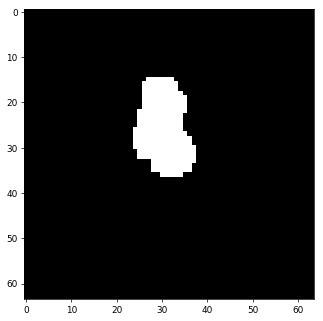

In [9]:
plt.figure(figsize=(15,6), dpi=64)
xImage = x_test[900]
print(xImage.shape)
xImage = xImage.reshape(-1,64,64)
print(xImage.shape)
imgPlot = plt.imshow(xImage[0], cmap='gray')
imgPlot = plt.imshow(new_dataset_test[900], cmap='gray')

In [17]:
new_dataset_test = np.array(new_dataset_test)
print (new_dataset_test.shape)

new_dataset_train = np.array(new_dataset_train)
print (new_dataset_train.shape)

(10000, 64, 64)
(50000, 64, 64)


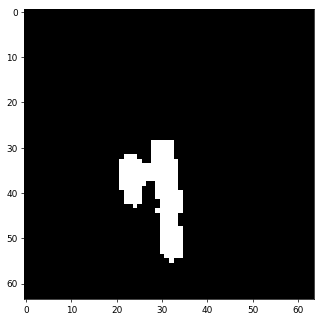

In [18]:
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(new_dataset_test[8000], cmap='gray')
reshaped_test = np.reshape(new_dataset_test, (10000, 4096))
reshaped_train = np.reshape(new_dataset_train, (50000, 4096))

In [19]:
pd.DataFrame(reshaped_test).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\test_x_preproc.csv',
                                   header = False, sep=',', index = False)
pd.DataFrame(reshaped_train).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\train_x_preproc.csv',
                                   header = False, sep=',', index = False)
